### Classification of Personal Income
This project is a case study performed as part of the 'Python for Data Science' course offered by NPTEL.

Classification is done using Logistic Regression and KNN classifiers and the accuracy of both the models are compared.

### Problem Statement
* Subsidy Inc. is a company which delivers subsidies to individuals based on their income.
* Accurate income data is one of the hardest piece of data to obtain across the world.
* Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and few financial parameters.
* Subsidy Inc. wishes us to:
    Develop an income classifier system for individuals.

### Objective
The main objective of the case study is to simplify the data system by reducing the
number of variables to be studied without sacrificing too much of accuracy. If we have very few parameters that needs to be
measured, then the data collection part will be easier. So, such a system would help
Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.

#### Import required libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.simplefilter('ignore')

In [2]:
#importing data
data = pd.read_csv("income.csv")
#creating a copy of original data
df = data.copy()

In [3]:
data.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
data.shape

(31978, 13)

### Dataset Description
The dataset contains 13 columns and 31978 rows. The 13 columns contain variables that describe the individual income, demographic parameters and few other financial parameters.

#### Variable Description:
1. age (int) - The age of the individual in years.
2. JobType (string) - The working status of a person i.e. the sector in which the individual works
3. EdType (string) - The level of education
4. maritalstatus (string) - The marital status of the individual
5. occupation (string) - The type of work the individual does
6. relationship (string) - The relationship of the individual to his or her household
7. race (string) - The individual's race
8. gender (string) - The individual's gender
9. capitalgain (int) - The capital gains of the individual
10. capitalloss (int) - The capital losses of the individual
11. hoursperweek (int) - The number of hours that the individual works per week
12. nativecountry (string) - The native country of the individual
13. SalStat (string) - The outcome variable indicating whether a person's salary status <= 50,000 or > 50,000

### Exploratory Data Analysis
1. Getting to know the data
2. Data Preprocessing (Missing values)
3. Cross tables and data visualization

#### 1. Getting to know the data

In [5]:
#to check variables' data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [6]:
#check for missing values
print(df.isnull())

         age  JobType  EdType  maritalstatus  occupation  relationship   race  \
0      False    False   False          False       False         False  False   
1      False    False   False          False       False         False  False   
2      False    False   False          False       False         False  False   
3      False    False   False          False       False         False  False   
4      False    False   False          False       False         False  False   
...      ...      ...     ...            ...         ...           ...    ...   
31973  False    False   False          False       False         False  False   
31974  False    False   False          False       False         False  False   
31975  False    False   False          False       False         False  False   
31976  False    False   False          False       False         False  False   
31977  False    False   False          False       False         False  False   

       gender  capitalgain 

In [7]:
print('Data columns with null values:\n',df.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [8]:
#summary of numerical variables
summary_num = df.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [9]:
#summary of categorical variables
summary_cate = df.describe(include = 'O')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [10]:
#frequency of each category
df['JobType'].value_counts()
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
#checking for unique classes
print(np.unique(df['JobType']))
print(np.unique(df['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [12]:
#there exists '?' instead of nan
#read the data again by including na_values[' ?'] to consider ' ?' as nan
df = pd.read_csv('income.csv',na_values=[' ?'])

#### 2. Data Preprocessing

In [13]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [14]:
missing = df[df.isnull().any(axis = 1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [15]:
df2 = df.dropna(axis = 0)
print(df2)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [16]:
#relationship between independent variables
correlation = df2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


#### 3. Cross Tables and Data Visualization

In [17]:
#extracting the column names
df2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

#### Gender proportion table

In [18]:
gender = pd.crosstab(index = df2['gender'],
                     columns = 'count',
                     normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


#### Gender Vs Salary status

In [19]:
gender_salstat = pd.crosstab(index = df2['gender'],
                             columns = df2['SalStat'],
                             margins = True,
                             normalize = 'index') #include row and column totals
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


#### Frequency distribution of 'Salary status'

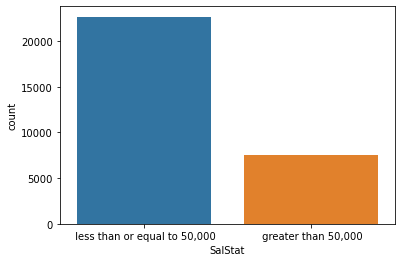

In [20]:
SalStat = sns.countplot(df2['SalStat'])

75% of people's salary status is <=50,000

25% of people's salary status is > 50,000

#### Histogram of Age

[Text(0.5, 1.0, 'Histogram of Age'),
 Text(0.5, 0, 'age'),
 Text(0, 0.5, 'count')]

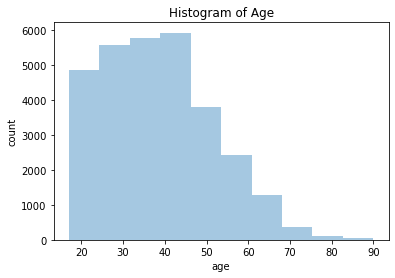

In [21]:
sns.distplot(df2['age'], bins=10, kde=False).set(title = 'Histogram of Age', xlabel = 'age', ylabel = 'count')

People with age 20-45 are high in frequency

#### Box Plot - Age Vs Salary status

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

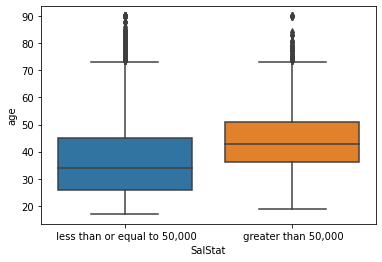

In [22]:
sns.boxplot('SalStat', 'age', data=df2)
df2.groupby('SalStat')['age'].median()

People with 35-50 age are more likely to earn > 50000 USD p.a

People with 25-35 age are more likely to earn <= 50000 USD p.a

#### JobType Vs Salary status

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


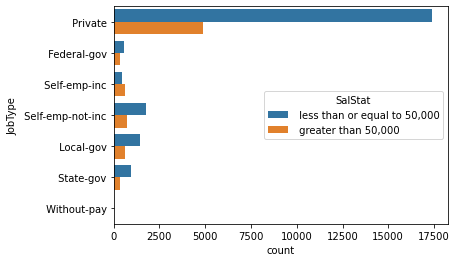

In [23]:
JobType = sns.countplot(y=df2['JobType'],hue = 'SalStat', data=df2)
job_salstat = pd.crosstab(index = df2["JobType"],
                          columns = df2['SalStat'], 
                          margins = True, 
                          normalize =  'index')  
round(job_salstat*100,1)

56% of self employed people earn >50000 USD per year.

#### Education Vs Salary status

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


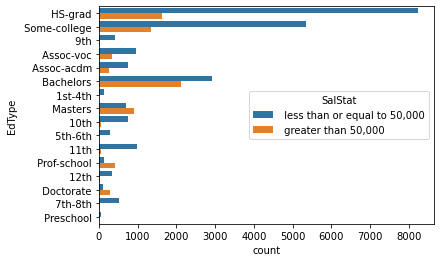

In [24]:
Education = sns.countplot(y=df2['EdType'],hue = 'SalStat', data=df2)
EdType_salstat = pd.crosstab(index = df2["EdType"], 
                             columns = df2['SalStat'],
                             margins = True,
                             normalize ='index')  
round(EdType_salstat*100,1)

People who have done Masters, Doctorate, Prof-school are more likely to earn > 50000 USD per year when compared to others.

#### Occupation Vs Salary status

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


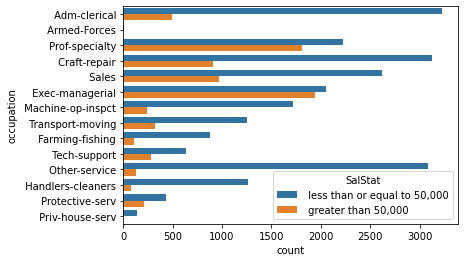

In [25]:
Occupation  = sns.countplot(y=df2['occupation'],hue = 'SalStat', data=df2)
occ_salstat = pd.crosstab(index = df2["occupation"], 
                          columns =df2['SalStat'],
                          margins = True,
                          normalize = 'index')  
round(occ_salstat*100,1)

People who make > 50000 USD per year are more likely to work as Managers and Professionals.

#### Capital Gain

<AxesSubplot:xlabel='capitalgain'>

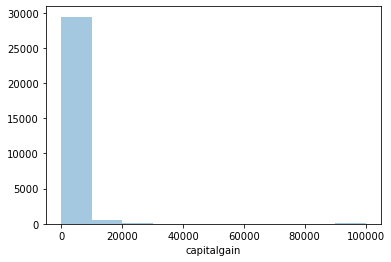

In [26]:
sns.distplot(df2['capitalgain'], bins = 10, kde = False)

#### Capital Loss

<AxesSubplot:xlabel='capitalloss'>

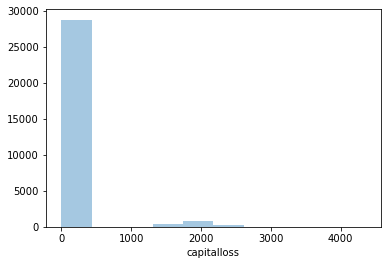

In [27]:
sns.distplot(df2['capitalloss'], bins = 10, kde = False)

### Logistic Regression

In [28]:
# Reindexing the salary status names to 0,1
df2['SalStat'] = df2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [29]:
new_data = pd.get_dummies(df2, drop_first=True)

In [30]:
# Storing the column names 
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [31]:
# Separating the input names from data
features = list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Portugal', 'relationship_ Own-child', 'race_ Other', 'EdType_ Doctorate', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'JobType_ State-gov', 'nativecountry_ Canada', 'EdType_ 9th', 'EdType_ Masters', 'relationship_ Other-relative', 'capitalgain', 'nativecountry_ Nicaragua', 'EdType_ Bachelors', 'nativecountry_ Dominican-Republic', 'nativecountry_ Guatemala', 'nativecountry_ Thailand', 'relationship_ Not-in-family', 'occupation_ Exec-managerial', 'nativecountry_ Haiti', 'EdType_ Assoc-voc', 'occupation_ Priv-house-serv', 'nativecountry_ Peru', 'nativecountry_ Hungary', 'race_ White', 'nativecountry_ Hong', 'occupation_ Prof-specialty', 'nativecountry_ Yugoslavia', 'JobType_ Without-pay', 'maritalstatus_ Married-AF-spouse', 'EdType_ Preschool', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Jamaica', 'hoursperweek', 'EdType_ 12th', 'occupation_ Other-service', 'EdType_ 5th-6th', 'maritalstatus_ Widowed', 'nativecountry_ Taiwan', 'occupation_ Armed-Forces', 'nativec

In [32]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [33]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
# Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
# Make an instance of the model
logistic = LogisticRegression()

In [36]:
# Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

array([-1.04044133])

In [37]:
# Prediction using test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [38]:
# Confusion matrix
conf_matrix = confusion_matrix(test_y, prediction)
print(conf_matrix)

[[6291  532]
 [ 947 1279]]


In [39]:
# Calculating the accuracy
acc_score = accuracy_score(test_y, prediction)
print(acc_score)

0.8365565255829374


In [40]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1479


### Logistic Regression - Removing Insignificant Variables

In [41]:
df3 = df.dropna(axis = 0)
print(df3)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [42]:
# Reindexing the salary status names to 0,1
df3['SalStat'] = df3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [43]:
cols = ['gender','nativecountry','race','JobType']
new_data2 = df3.drop(cols,axis = 1)

In [44]:
new_data2 = pd.get_dummies(new_data2, drop_first=True)

In [45]:
# Storing the column names
columns_list2 = list(new_data2.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [46]:
# Separating the input names from data
features2 = list(set(columns_list2)-set(['SalStat']))
print(features2)

['occupation_ Handlers-cleaners', 'occupation_ Sales', 'relationship_ Own-child', 'occupation_ Craft-repair', 'EdType_ Doctorate', 'relationship_ Wife', 'occupation_ Farming-fishing', 'EdType_ 9th', 'EdType_ HS-grad', 'EdType_ Masters', 'relationship_ Other-relative', 'maritalstatus_ Married-spouse-absent', 'occupation_ Protective-serv', 'maritalstatus_ Separated', 'capitalgain', 'EdType_ 1st-4th', 'EdType_ Bachelors', 'relationship_ Not-in-family', 'occupation_ Exec-managerial', 'EdType_ Assoc-voc', 'occupation_ Tech-support', 'EdType_ 11th', 'occupation_ Priv-house-serv', 'occupation_ Machine-op-inspct', 'occupation_ Prof-specialty', 'maritalstatus_ Married-AF-spouse', 'EdType_ Preschool', 'age', 'hoursperweek', 'EdType_ 12th', 'occupation_ Other-service', 'relationship_ Unmarried', 'maritalstatus_ Married-civ-spouse', 'EdType_ 5th-6th', 'maritalstatus_ Widowed', 'EdType_ Prof-school', 'occupation_ Armed-Forces', 'EdType_ 7th-8th', 'EdType_ Some-college', 'capitalloss', 'EdType_ Asso

In [47]:
print(new_data2)

       age  capitalgain  capitalloss  hoursperweek  SalStat  EdType_ 11th  \
0       45            0            0            28        0             0   
1       24            0            0            40        0             0   
2       44            0            0            40        1             0   
3       27            0            0            40        0             0   
4       20            0            0            35        0             0   
...    ...          ...          ...           ...      ...           ...   
31973   34          594            0            60        0             0   
31974   34            0            0            40        0             0   
31975   23            0            0            40        0             0   
31976   42            0            0            40        0             0   
31977   29            0            0            40        0             0   

       EdType_ 12th  EdType_ 1st-4th  EdType_ 5th-6th  EdType_ 7th-8th  ...

In [48]:
# Storing the output values in y
y2 = new_data2['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [49]:
# Storing the values from input features
x2 = new_data2[features2].values
print(x2)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [50]:
# Splitting the data into train and test
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [51]:
# Make an instance of the model
logistic2 = LogisticRegression()

In [52]:
# Fitting the values for x and y
logistic2.fit(train_x2, train_y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Prediction using test data
prediction2 = logistic2.predict(test_x2)
print(prediction2)

[0 0 0 ... 0 0 0]


In [54]:
# Confusion matrix
conf_matrix2 = confusion_matrix(test_y2, prediction2)
print(conf_matrix2)

[[6289  534]
 [ 974 1252]]


In [55]:
# Calculating the accuracy
acc_score2 = accuracy_score(test_y2, prediction2)
print(acc_score2)

0.8333517515747596


In [56]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction2).sum())

Misclassified samples: 1508


###  K - Nearest Neighbors (KNN)

In [57]:
df4 = df.dropna(axis = 0)
print(df4)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [58]:
# Reindexing the salary status names to 0,1
df4['SalStat'] = df4['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df4['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [59]:
new_data3 = pd.get_dummies(df4, drop_first=True)

In [60]:
# Storing the column names
columns_list3 = list(new_data3.columns)
print(columns_list3)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [61]:
# Separating the input names from data
features3 = list(set(columns_list3)-set(['SalStat']))
print(features3)

['nativecountry_ Portugal', 'relationship_ Own-child', 'race_ Other', 'EdType_ Doctorate', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'JobType_ State-gov', 'nativecountry_ Canada', 'EdType_ 9th', 'EdType_ Masters', 'relationship_ Other-relative', 'capitalgain', 'nativecountry_ Nicaragua', 'EdType_ Bachelors', 'nativecountry_ Dominican-Republic', 'nativecountry_ Guatemala', 'nativecountry_ Thailand', 'relationship_ Not-in-family', 'occupation_ Exec-managerial', 'nativecountry_ Haiti', 'EdType_ Assoc-voc', 'occupation_ Priv-house-serv', 'nativecountry_ Peru', 'nativecountry_ Hungary', 'race_ White', 'nativecountry_ Hong', 'occupation_ Prof-specialty', 'nativecountry_ Yugoslavia', 'JobType_ Without-pay', 'maritalstatus_ Married-AF-spouse', 'EdType_ Preschool', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Jamaica', 'hoursperweek', 'EdType_ 12th', 'occupation_ Other-service', 'EdType_ 5th-6th', 'maritalstatus_ Widowed', 'nativecountry_ Taiwan', 'occupation_ Armed-Forces', 'nativec

In [62]:
# Storing the output values in y
y3 = new_data3['SalStat'].values
print(y3)

[0 0 1 ... 0 0 0]


In [63]:
# Storing the values from input features
x3 = new_data3[features3].values
print(x3)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
# Splitting the data into train and test
train_x3,test_x3,train_y3,test_y3 = train_test_split(x3, y3, test_size=0.3, random_state=0)

In [65]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [66]:
# Fitting the values for x and y
KNN_classifier.fit(train_x3, train_y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
# Predicting the test values with model
prediction3 = KNN_classifier.predict(test_x3)

In [68]:
# Performance metric check
conf_matrix3 = confusion_matrix(test_y3, prediction3)
print(conf_matrix3)

[[6181  642]
 [ 814 1412]]


In [69]:
# Calculating the accuracy
acc_score3 = accuracy_score(test_y3, prediction3)
print(acc_score3)

0.839098242899768


In [70]:
print('Misclassified samples: %d' % (test_y3 != prediction).sum())

Misclassified samples: 1479


### Final Results

In [71]:
print("\n Accuracy of Logistic Regression classifier = ",acc_score)
print("\n Accuracy of Logistic Regression classifier (After Removing Insignificant Variables) = ",acc_score2)
print("\n Accuracy of KNN classifier = ",acc_score3)


 Accuracy of Logistic Regression classifier =  0.8365565255829374

 Accuracy of Logistic Regression classifier (After Removing Insignificant Variables) =  0.8333517515747596

 Accuracy of KNN classifier =  0.839098242899768


In [72]:
print("Maximum accuracy = ", max(acc_score, acc_score2, acc_score3))

Maximum accuracy =  0.839098242899768


It can be seen that the accuracy of the KNN classifier is slightly higher than the accuracy of the Logistic Regression classifier.